In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from math import sqrt

transformar_features = True
data = pd.read_csv('./df_input.csv', sep=';', delimiter=';')
one_hot_encoder = OneHotEncoder(sparse=False)

In [2]:
print('Quantidade de Linhas de Onibus', len(data.linha.unique()))

busline_filter = 41
df_dados = data.loc[data['linha'] == busline_filter]
encoded_model_data = df_dados.copy()
encoded_model_data[['domingo','segunda', 'terca', 'quarta', 'quinta', 'sexta', 'sabado']] = one_hot_encoder.fit_transform(df_dados['d_semana'].values.reshape(-1,1))
df_dados = encoded_model_data.copy()
display(df_dados)

Quantidade de Linhas de Onibus 404


,linha,data_hora,validations_per_hour,d_semana,hour_sin,hour_cos,hora,d_mes,d_ano,mes,semana_do_mes,domingo,segunda,terca,quarta,quinta,sexta,sabado
2418,41,2020-03-01 04:00:00,25,6,8.878852e-01,0.460065,4,1,61,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2419,41,2020-03-01 05:00:00,168,6,9.790841e-01,0.203456,5,1,61,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2420,41,2020-03-01 06:00:00,310,6,9.976688e-01,-0.068242,6,1,61,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2421,41,2020-03-01 07:00:00,339,6,9.422609e-01,-0.334880,7,1,61,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2422,41,2020-03-01 08:00:00,286,6,8.169699e-01,-0.576680,8,1,61,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418148,41,2020-12-31 20:00:00,138,3,-7.308360e-01,0.682553,20,31,366,12,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1418149,41,2020-12-31 21:00:00,83,3,-5.195840e-01,0.854419,21,31,366,12,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1418150,41,2020-12-31 22:00:00,54,3,-2.697968e-01,0.962917,22,31,366,12,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1418151,41,2020-12-31 23:00:00,30,3,-2.449294e-16,1.000000,23,31,366,12,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3]:
feature_names = ['linha', 'hour_sin', 'hour_cos', 'd_semana', 'd_mes','d_ano', 'domingo','segunda', 'terca', 'quarta', 'quinta', 'sexta', 'sabado', 'validations_per_hour']
df_dados_model = df_dados.filter(feature_names)

display(df_dados_model)

,linha,hour_sin,hour_cos,d_semana,d_mes,d_ano,domingo,segunda,terca,quarta,quinta,sexta,sabado,validations_per_hour
2418,41,8.878852e-01,0.460065,6,1,61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25
2419,41,9.790841e-01,0.203456,6,1,61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,168
2420,41,9.976688e-01,-0.068242,6,1,61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,310
2421,41,9.422609e-01,-0.334880,6,1,61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,339
2422,41,8.169699e-01,-0.576680,6,1,61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418148,41,-7.308360e-01,0.682553,3,31,366,0.0,0.0,0.0,1.0,0.0,0.0,0.0,138
1418149,41,-5.195840e-01,0.854419,3,31,366,0.0,0.0,0.0,1.0,0.0,0.0,0.0,83
1418150,41,-2.697968e-01,0.962917,3,31,366,0.0,0.0,0.0,1.0,0.0,0.0,0.0,54
1418151,41,-2.449294e-16,1.000000,3,31,366,0.0,0.0,0.0,1.0,0.0,0.0,0.0,30


In [4]:
if(transformar_features): 
    scaler = MinMaxScaler(feature_range=(0, 1))

    df_dados_model[feature_names] = scaler.fit_transform(df_dados_model[feature_names])

    df_dados_model
df_dados_model

,linha,hour_sin,hour_cos,d_semana,d_mes,d_ano,domingo,segunda,terca,quarta,quinta,sexta,sabado,validations_per_hour
2418,0.0,0.944980,0.728769,1.000000,0.0,0.164384,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.016973
2419,0.0,0.990686,0.599865,1.000000,0.0,0.164384,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.118105
2420,0.0,1.000000,0.463380,1.000000,0.0,0.164384,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.218529
2421,0.0,0.972231,0.329437,1.000000,0.0,0.164384,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.239038
2422,0.0,0.909439,0.207971,1.000000,0.0,0.164384,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.201556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418148,0.0,0.133728,0.840534,0.500000,1.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.096888
1418149,0.0,0.239601,0.926869,0.500000,1.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.057992
1418150,0.0,0.364786,0.981372,0.500000,1.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.037482
1418151,0.0,0.500000,1.000000,0.500000,1.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.020509


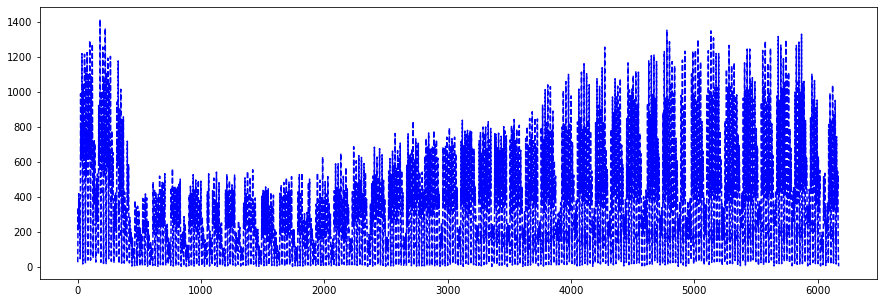

In [5]:
plt.figure(figsize=(15,5))
plt.plot(range(len(df_dados)),df_dados['validations_per_hour'], 'b--')
# plt.xlim(300,400)
plt.show()

In [6]:
time_steps = 24
test_size = 24

train_size = int(len(df_dados_model)-(test_size))
train, test = df_dados_model.iloc[0:train_size], df_dados_model.iloc[(train_size-time_steps):len(df_dados_model)]

print(len(train), len(test))


6148 48


In [7]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps),0].to_numpy()
        #v = np.append(v,X.iloc[i + time_steps,0])#linha
        v = np.append(v,X.iloc[i + time_steps,1])#d_semana
        v = np.append(v,X.iloc[i + time_steps,2])#hr_sin
        v = np.append(v,X.iloc[i + time_steps,3])#hr_cos
        v = np.append(v,X.iloc[i + time_steps,4])#d_mes
        v = np.append(v,X.iloc[i + time_steps,5])#d_ano
        v = np.append(v,X.iloc[i + time_steps,6])#d_semanaonehotencoded
        v = np.append(v,X.iloc[i + time_steps,7])#d_semanaonehotencoded
        v = np.append(v,X.iloc[i + time_steps,8])#d_semanaonehotencoded
        v = np.append(v,X.iloc[i + time_steps,9])#d_semanaonehotencoded
        v = np.append(v,X.iloc[i + time_steps,10])#d_semanaonehotencoded
        v = np.append(v,X.iloc[i + time_steps,11])#d_semanaonehotencoded
        v = np.append(v,X.iloc[i + time_steps,12])#d_semanaonehotencoded 
        Xs.append([v])
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_dataset(train, train['validations_per_hour'], time_steps)
X_test, y_test = create_dataset(test, test['validations_per_hour'], time_steps)

In [8]:
display(X_train[1])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.90943944,
        0.20797134, 0.        , 0.03333333, 0.16712329, 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [9]:
def getModel():
    model = tf.keras.Sequential()
    
    # MLP    
    model.add(tf.keras.layers.Dense(300, activation="relu", input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dense(100, activation="relu"))
    model.add(tf.keras.layers.Dense(30, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="relu"))
    
    # Vanilla LSTM
    # model.add(tf.keras.layers.LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
        
#     # Stacked LSTM
#     model.add(tf.keras.layers.LSTM(300, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]) ))
#     model.add(tf.keras.layers.LSTM(100, activation='relu', return_sequences=True))
#     model.add(tf.keras.layers.LSTM(30, activation='relu', return_sequences=True))
#     model.add(tf.keras.layers.LSTM(10, activation='relu'))
    
    # Bidirectional LSTM
#     model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])))
    
    model.add(tf.keras.layers.Dense(units=1, activation='softplus'))
    # model.add(tf.keras.layers.Dense(units=1))

    return model

In [10]:
model = getModel()

optimizer = tf.keras.optimizers.Adam(0.002)

model.compile(
  loss='mse',
  optimizer=optimizer
)
# model.compile(
#   loss='mean_squared_error',
#   optimizer=tf.keras.optimizers.SGD(0.05)
# )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 300)            11100     
_________________________________________________________________
dense_1 (Dense)              (None, 1, 100)            30100     
_________________________________________________________________
dense_2 (Dense)              (None, 1, 30)             3030      
_________________________________________________________________
dense_3 (Dense)              (None, 1, 10)             310       
_________________________________________________________________
dense_4 (Dense)              (None, 1, 1)              11        
Total params: 44,551
Trainable params: 44,551
Non-trainable params: 0
_________________________________________________________________


In [11]:
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, min_delta=1e-4, mode='min')]

callbacks.append(tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, restore_best_weights=True))

history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=48,
    validation_split=0.2,
    callbacks=callbacks,
    shuffle=False
)

Epoch 1/500
103/103 [==============================] - 0s 4ms/step - loss: 0.0150 - val_loss: 0.0179
Epoch 2/500
103/103 [==============================] - 0s 2ms/step - loss: 0.0112 - val_loss: 0.0105
Epoch 3/500
103/103 [==============================] - 0s 2ms/step - loss: 0.0111 - val_loss: 0.0099
Epoch 4/500
103/103 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0092
Epoch 5/500
103/103 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0102
Epoch 6/500
103/103 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0101
Epoch 7/500
103/103 [==============================] - 0s 1ms/step - loss: 0.0092 - val_loss: 0.0103
Epoch 8/500
103/103 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.0102
Epoch 9/500
103/103 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.0101
Epoch 10/500
103/103 [==============================] - 0s 2ms/step - loss: 0.0094 - val_lo

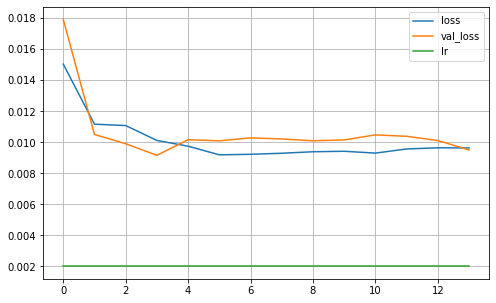

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [13]:
# PREVENDO test_size DIAS

preds = []

base_teste = np.copy(X_test)

for i in range(len(base_teste)):
    
    y_pred = model.predict(np.array([base_teste[i]]))[0][0]

    preds.append(y_pred)

    for k in range(len(preds)):
        
        if k < time_steps:
            if(i<len(base_teste)-1):
                base_teste[i+1][0][(time_steps-1)-k] = preds[(len(preds)-1)-k]

# preds

In [14]:
base_teste[0].shape

(1, 36)

In [15]:
# APLICANDO O INVERSE SCALING NOS DADOS

dados_pred = {'validations_per_hour': preds,'d_semana': [0] * test_size,'d_mes': [0] * test_size,'d_ano': [0] * test_size}

df_dados_model = df_dados_model.append(pd.DataFrame(data=dados_pred))

if(transformar_features):
    df_dados_model[feature_names] = scaler.inverse_transform(df_dados_model[feature_names])

df_dados_real_predito = df_dados_model.tail(test_size*2)

dados_real = df_dados_real_predito [0:test_size]['validations_per_hour'].to_numpy()

dados_predito = df_dados_real_predito [test_size:test_size*2]['validations_per_hour'].to_numpy()


# dados_predito

In [16]:
df_real_predito = pd.DataFrame({'real':dados_real,'predito':dados_predito})

df_real_predito

,real,predito
0,223.0,109.215814
1,102.0,84.587130
2,15.0,80.201048
3,31.0,241.290180
4,242.0,462.202438
5,610.0,770.557717
6,744.0,690.908157
7,575.0,548.691146
8,427.0,462.677150
9,315.0,418.663606


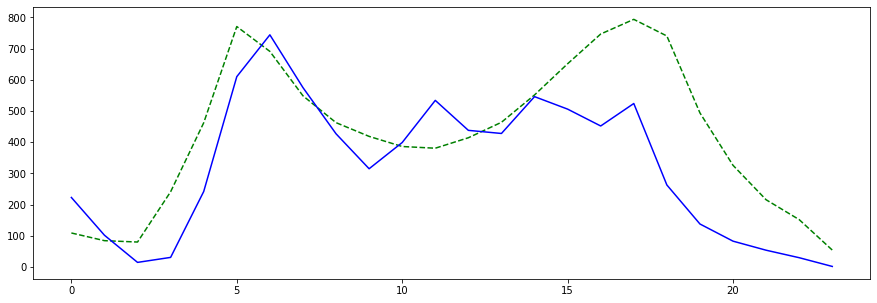

In [17]:
plt.figure(figsize=(15,5))
# plt.plot(range(len(y_train)),y_train, 'g--')
plt.plot(range(len(df_real_predito['predito'])),df_real_predito['predito'], 'g--')
plt.plot(range(len(df_real_predito['real'])),df_real_predito['real'], 'b')
# plt.xlim(0,200)
# plt.ylim(40,200)
plt.show()

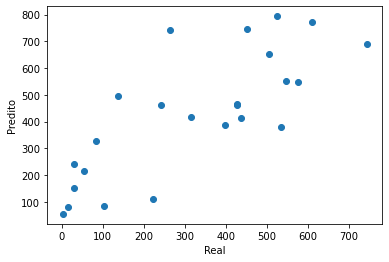

r2= 0.29189724521787275
rmse= 184.2645851747253
mae= 139.95390569170317


In [18]:
plt.scatter(df_real_predito['real'],df_real_predito['predito'])

plt.xlabel('Real')
plt.ylabel('Predito')

plt.show()
print('r2=',r2_score(df_real_predito['real'].array,df_real_predito['predito'].array))
print('rmse=',sqrt(mean_squared_error(df_real_predito['real'].array,df_real_predito['predito'].array)))
print('mae=',mean_absolute_error(df_real_predito['real'].array,df_real_predito['predito'].array))